In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

2025-02-06 14:33:12.610094: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-06 14:33:12.623123: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738873992.635740 2984627 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738873992.639436 2984627 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-06 14:33:12.652882: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers

model = keras.Sequential([
    layers.Dense(12, activation="relu"),
    layers.Dense(12, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
inner_opt = keras.optimizers.Adamax(learning_rate = .00001)
my_optimizer = keras.optimizers.LossScaleOptimizer(inner_optimizer=inner_opt)
model.compile(optimizer= my_optimizer,
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

I0000 00:00:1738873997.757550 2984627 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22293 MB memory:  -> device: 0, name: NVIDIA A30, pci bus id: 0000:21:00.0, compute capability: 8.0


In [3]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=750,
                    batch_size=512,
                    validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
"""
adamax, lr .0001, 90 epoch, 16, 16 = .8832
"""

Epoch 1/750


I0000 00:00:1738873998.826103 2985036 service.cc:148] XLA service 0x145070016080 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738873998.826280 2985036 service.cc:156]   StreamExecutor device (0): NVIDIA A30, Compute Capability 8.0
2025-02-06 14:33:18.845141: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738873998.945364 2985036 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-02-06 14:33:19.005028: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.2 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5034 - loss: 0.6941

I0000 00:00:1738873999.853391 2985036 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.5029 - loss: 0.6941 - val_accuracy: 0.4941 - val_loss: 0.6937
Epoch 2/750
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4974 - loss: 0.6943 - val_accuracy: 0.4961 - val_loss: 0.6931
Epoch 3/750
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4994 - loss: 0.6932 - val_accuracy: 0.4975 - val_loss: 0.6927
Epoch 4/750
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5097 - loss: 0.6926 - val_accuracy: 0.4993 - val_loss: 0.6922
Epoch 5/750
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5033 - loss: 0.6925 - val_accuracy: 0.5014 - val_loss: 0.6918
Epoch 6/750
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5105 - loss: 0.6915 - val_accuracy: 0.5037 - val_loss: 0.6914
Epoch 7/750
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5127 - loss: 0.6909 - val_accuracy: 0.5062 - val_loss: 0.6909
Epoch 8/750
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5188 - loss: 0.6901 - val_accuracy: 0.5080 - val_loss: 0.

'\nadamax, lr .0001, 90 epoch, 16, 16 = .8832\nadamW, lr .0001, 29 epoch, 16, 16 = .8798\nadam, lr .0001, 29 epoch, 16, 16 = .8795\nRMSprop, lr .0001, 29 epoch, 16, 16 = .8851\nL2 reg:\nRMSprop, lr .0001, 29 epoch, 16, 16 = .8826\n\nadamax, lr .0001, 75 epoch, 12, 12, = .8844\n\n'

In [4]:
print(results)
"""
Best model test accuracy: .8844
validation accuracy: .8905
train accuracy: .9401
"""

[0.2908749580383301, 0.8829200267791748]


In [5]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

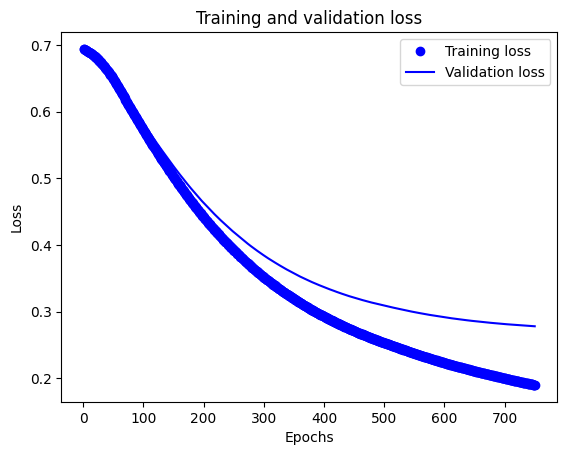

In [6]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

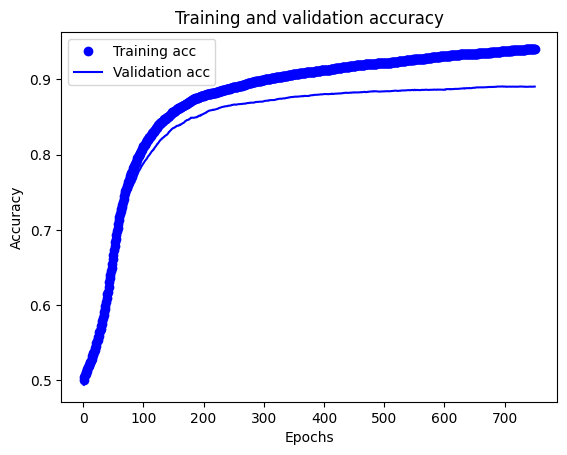

In [7]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()